In [25]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam,Nadam # - Works
import random
from glob import glob
import seaborn as sns
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import matplotlib.image as img
import warnings
import shutil
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [1]:
!pip install -q Augmentor

In [2]:
path_to_training_dataset = '/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/'
class_names = ['Cancer','Non_Cancer']
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i + '/Training', output_directory='/kaggle/working/Train/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(2000)

Initialised with 42 image(s) found.
Output directory set to /kaggle/working/Train/Cancer.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=560x630 at 0x7B0ADC483EE0>: 100%|██████████| 2000/2000 [00:47<00:00, 42.05 Samples/s]  


Initialised with 42 image(s) found.
Output directory set to /kaggle/working/Train/Non_Cancer.

Processing <PIL.Image.Image image mode=RGB size=330x270 at 0x7B0ADC4E90F0>: 100%|██████████| 2000/2000 [00:20<00:00, 96.99 Samples/s]                    


In [11]:
data_dir = '/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data'  # Update this to your dataset directory
output_dir = '/kaggle/working/'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create subdirectories for train and valid (no test directory)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)


# Define the classes for binary classification
classes = ['Cancer', 'Non_Cancer']

# Move data from source to train/valid folders
for class_name in classes:
    class_dir = os.path.join(data_dir,class_name,"Testing")

    # Create subdirectories for train and valid within each class
    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)
#     os.makedirs(os.path.join(output_dir, 'valid', class_name), exist_ok=True)

    # List all files in the current class directory
    files = os.listdir(class_dir)


    # Move files to train
    for file in files:
        source_path = os.path.join(class_dir, file)
        dest_path = os.path.join(output_dir, 'test', class_name, file)
        shutil.copyfile(source_path, dest_path)

print("Data preprocessing for binary classification complete.")

Data preprocessing for binary classification complete.


In [7]:
batch_size = 16
img_height = 180
img_width = 180

In [14]:
output_dir = '/kaggle/working/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [15]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [16]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/kaggle/working/test',
  seed=123,
  validation_split = 0.9,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 204 files belonging to 2 classes.
Using 183 files for validation.


In [23]:
input_shape = (img_height,img_width,3)
model = Sequential([layers.experimental.preprocessing.Rescaling(1.0/255,input_shape=input_shape)])
model.add(Conv2D(16,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.15))
model.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.15))
model.add(Conv2D(128,(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [26]:
opt = Nadam(lr=0.001)
model.compile(optimizer= opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [27]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


2023-10-11 11:15:22.066589: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


200/200 [==============================] - 10s 30ms/step - loss: 0.3426 - accuracy: 0.8272 - val_loss: 0.0552 - val_accuracy: 0.9737
Epoch 2/25
200/200 [==============================] - 7s 34ms/step - loss: 0.0528 - accuracy: 0.9819 - val_loss: 0.0315 - val_accuracy: 0.9887
Epoch 3/25
200/200 [==============================] - 6s 29ms/step - loss: 0.0416 - accuracy: 0.9834 - val_loss: 0.0428 - val_accuracy: 0.9825
Epoch 4/25
200/200 [==============================] - 6s 30ms/step - loss: 0.0346 - accuracy: 0.9875 - val_loss: 0.0228 - val_accuracy: 0.9950
Epoch 5/25
200/200 [==============================] - 6s 29ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0555 - val_accuracy: 0.9800
Epoch 6/25
200/200 [==============================] - 6s 29ms/step - loss: 0.0165 - accuracy: 0.9937 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/25
200/200 [==============================] - 7s 35ms/step - loss: 9.9018e-04 - accuracy: 0.9997 - val_loss: 2.6245e-04 - val_accuracy: 1.0000
E

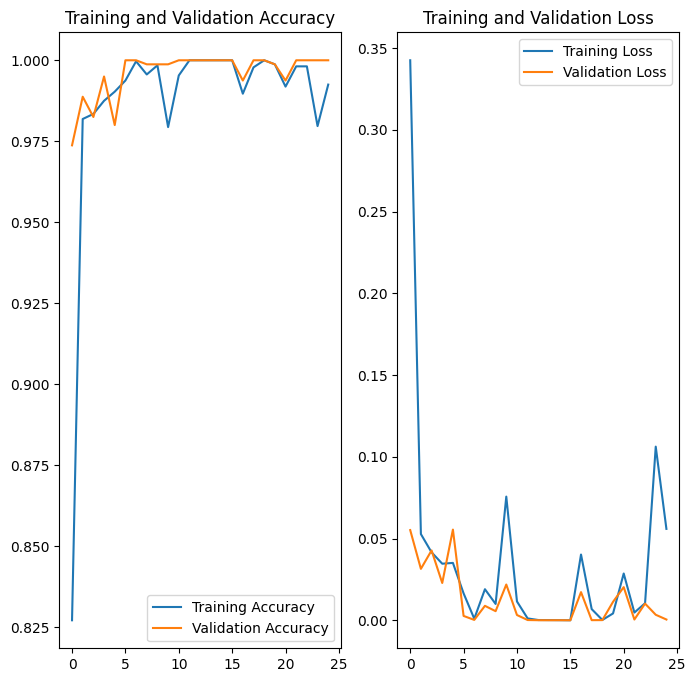

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
(eval_loss, eval_accuracy) = model.evaluate(test_ds, batch_size=batch_size)

12/12 [==============================] - 0s 11ms/step - loss: 2.8941 - accuracy: 0.7814


In [30]:
model.save("Binary Dataset 78.14%acc.h5")

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [67]:
img = image.load_img('/kaggle/input/skin-cancer-binary-classification-dataset/Skin_Data/Cancer/Testing/2343-2.JPG',target_size =(180,180))

In [68]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =model.predict(x)
if(float(pred[0]) >= 0.5):
    print("Non Cancer")
else:
    print("Cancer")
score = float(pred[0])
print(f"This image is {100 * (1 - score):.2f}% Cancer and {100 * score:.2f}% Non Cancer.")

1/1 [==============================] - 0s 19ms/step
Cancer
This image is 98.57% Cancer and 1.43% Non Cancer.
